# Classificação com Naive-Bayes

Dados desbalanceados

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as srn
srn.set()

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
dataset = pd.read_csv('Bases de dados/credit_data.csv')
print(dataset.shape)
dataset.head()

(2000, 5)


,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

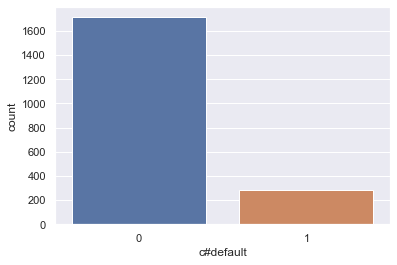

In [4]:
srn.countplot(x=dataset['c#default']);

In [5]:
X = dataset.iloc[:, 1:4]  # atributos
y = dataset.iloc[:, 4]    # classe
X.shape, y.shape

((1997, 3), (1997,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1597, 3), (400, 3), (1597,), (400,))

In [7]:
(np.unique(y, return_counts=True)) 

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [8]:
1714/len(dataset), 283/len(dataset)

(0.8582874311467201, 0.14171256885327993)

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [10]:
1371/ len(y_train), 226/len(y_train)

(0.8584846587351284, 0.14151534126487164)

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [12]:
343/ len(y_test), 57/len(y_test)

(0.8575, 0.1425)

In [13]:
modelo = GaussianNB()
modelo.fit(X_train, y_train)

GaussianNB()

In [14]:
previsoes = modelo.predict(X_test)
previsoes.shape

(400,)

In [15]:
accuracy_score(previsoes, y_test)

0.93

In [16]:
cm = confusion_matrix(previsoes, y_test)
cm

array([[336,  21],
       [  7,  36]], dtype=int64)

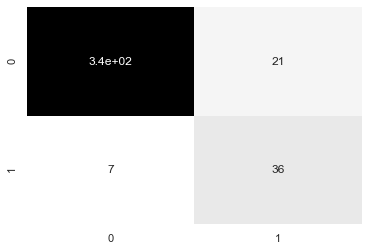

In [17]:
srn.heatmap(cm, annot=True, cmap='binary', cbar=False);

In [18]:
print(classification_report(previsoes, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       357
           1       0.63      0.84      0.72        43

    accuracy                           0.93       400
   macro avg       0.81      0.89      0.84       400
weighted avg       0.94      0.93      0.93       400



## Subamostragem (undersampling)

- Tokek Links

In [19]:
from imblearn.under_sampling import TomekLinks

In [20]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [21]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [22]:
np.unique(y_under, return_counts=True)

(array([0, 1], dtype=int64), array([1614,  283], dtype=int64))

In [23]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, stratify=y_under)
X_train_under.shape, X_test_under.shape, y_train_under.shape, y_test_under.shape

((1517, 3), (380, 3), (1517,), (380,))

In [24]:
modelo_under = GaussianNB()
modelo_under.fit(X_train_under, y_train_under)
previsoes_under = modelo.predict(X_test_under)
previsoes_under.shape

(380,)

In [25]:
accuracy_score(previsoes_under, y_test_under)

0.9184210526315789

In [26]:
cm_under = confusion_matrix(previsoes_under, y_test_under)
cm_under

array([[317,  25],
       [  6,  32]], dtype=int64)

In [27]:
print(classification_report(previsoes_under, y_test_under))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       342
           1       0.56      0.84      0.67        38

    accuracy                           0.92       380
   macro avg       0.77      0.88      0.81       380
weighted avg       0.94      0.92      0.93       380



## Sobreamostragem (oversampling)
- SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [30]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [31]:
np.unique(y_over, return_counts=True)

(array([0, 1], dtype=int64), array([1714, 1714], dtype=int64))

In [32]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, stratify=y_over)
X_train_over.shape, X_test_over.shape, y_train_over.shape, y_test_over.shape

((2742, 3), (686, 3), (2742,), (686,))

In [33]:
modelo_over = GaussianNB()
modelo_over.fit(X_train_over, y_train_over)
previsoes_over = modelo.predict(X_test_over)
previsoes_over.shape

(686,)

In [34]:
accuracy_score(previsoes_over, y_test_over)

0.7944606413994169

In [35]:
cm_over = confusion_matrix(previsoes_over, y_test_over)
cm_over

array([[337, 135],
       [  6, 208]], dtype=int64)

In [36]:
print(classification_report(previsoes_over, y_test_over))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83       472
           1       0.61      0.97      0.75       214

    accuracy                           0.79       686
   macro avg       0.79      0.84      0.79       686
weighted avg       0.87      0.79      0.80       686

